### 2. Preguntas a resolver

In [2]:
##Importar las librerías requeridas para el análisis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
##Definir tamaño máximo de filas a mostrar
pd.set_option('display.max_rows', 100)

In [4]:
##Importar el dataset del CSV
comercio_df = pd.read_csv('../data/hurto_comercioV2.csv', low_memory = False)

In [11]:
##Visualizar el conjunto de datos
comercio_df

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,TIPO DE HURTO,CANTIDAD
0,CAQUETÁ,SAN VICENTE DEL CAGUÁN,18753,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,HURTO RESIDENCIAS,1
1,CAUCA,POPAYÁN,19001,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,HURTO RESIDENCIAS,2
2,HUILA,PITALITO,41551,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
3,VALLE,JAMUNDÍ,76364,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
4,AMAZONAS,LETICIA,91001,CONTUNDENTES,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
...,...,...,...,...,...,...,...,...,...
492958,MAGDALENA,SANTA MARTA,47001,NO REPORTA,28/02/2022,FEMENINO,ADULTOS,HURTO RESIDENCIAS,1
492959,SANTANDER,BUCARAMANGA,68001,NO REPORTA,30/03/2022,FEMENINO,ADULTOS,HURTO RESIDENCIAS,1
492960,SUCRE,MAJAGUAL,70429,NO REPORTA,12/01/2022,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
492961,SUCRE,SAN LUIS DE SINCÉ,70742,NO REPORTA,21/02/2022,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1


#### 2.1. ¿Cuáles han sido los departamentos (TOP 3) más afectados en términos de cantidad de delitos cometidos en los últimos 5 años?

In [7]:
##Departamentos con mayor número de delitos registrados
comercio_df['FECHA HECHO'] = pd.to_datetime(comercio_df['FECHA HECHO'], format = '%d/%m/%Y')
comercio_df['FECHA HECHO'].dt.year
comercio_df.groupby(['DEPARTAMENTO']).apply(lambda x: x[x['FECHA HECHO'].dt.year>2017]['CANTIDAD'].sum()).sort_values(ascending=False).head(3)

DEPARTAMENTO
CUNDINAMARCA    98959
ANTIOQUIA       42104
VALLE           27960
dtype: int64

##### R:// Cundinamarca (31,02%), Antioquia (13,19%) y Valle (8,76%) presentan en los últimos 5 años la mayor cantidad de delitos registrados en  hurtos cometidos a viviendas y comercio. Como es de esperarse, las ciudades con un número mayor de habitantes presenta mas robos.

#### 2.2. Para los casos en los que aplique, ¿cuál ha sido el arma o medio más común para cometer el delito.

In [34]:
##Visualizamos aquellas armas-medios con las que más se cometen delitos
comercio_df.groupby(['ARMAS MEDIOS'])['CANTIDAD'].apply(lambda x : x.astype(int).sum()).sort_values(ascending = False).head(1)

ARMAS MEDIOS
SIN EMPLEO DE ARMAS    372400
Name: CANTIDAD, dtype: int64

 ###### R:// En este caso se puede observar que sin utilizar ningún tipo de arma se realizan más hurtos dentro de las viviendas y áreas comerciales.

#### 2.3. Para los casos en los que aplique, ¿cómo ha sido la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

In [24]:
anios = comercio_df.groupby(comercio_df['FECHA HECHO'].dt.strftime('%Y'))['CANTIDAD'].sum().sort_values()
#anios.plot(kind='barh')

In [26]:
genero = comercio_df.groupby(comercio_df['GENERO'])['CANTIDAD'].sum().sort_values()
genero

GENERO
FEMENINO      159708
MASCULINO     190447
NO REPORTA    360239
Name: CANTIDAD, dtype: int64

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (13).

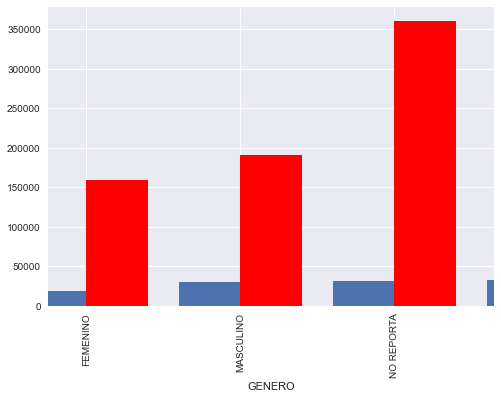

In [30]:
plt.style.use('seaborn')
ax = anios.plot(kind="bar", width=-0.4, rot=0, stacked=True, align='edge')
genero.plot(ax=ax, width=0.4, kind="bar",align='edge', color="red")
ax.set_xticklabels(anios)
ax.set_ylabel('Cantidad de hurtos', fontsize = 14)
ax.set_xlabel('Año', fontsize = 14)
#ax.set_title("Clientes Anuales %s" % titulos[var_almacen], fontsize = 16)
plt.autoscale(enable=True, axis='x')
plt.show()

#### 2.4. ¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

In [35]:
#Almacenamos los meses y su cantidad de hurtos en un nuevo dataframe
meses = comercio_df.groupby(comercio_df['FECHA HECHO'].dt.month)['CANTIDAD'].sum()

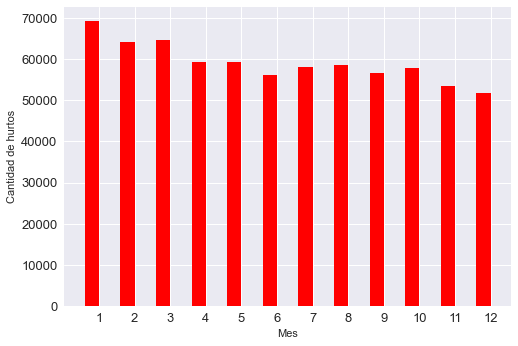

In [41]:
#Graficamos el dataframe para una mejor interpretación de los datos
plt.style.use('seaborn')
ax = meses.plot(kind="bar", width=-0.4, rot=0, stacked=True, align='edge', color='red', ylabel='Cantidad de hurtos', xlabel='Mes', fontsize=13)
plt.autoscale(enable=True, axis='x')
plt.show()

##### R:// En el gráfico anterior se refleja que la mayor cantidad de hurtos cometidos a viviendas y comercios es a principio de año representando el 27,91% del total de hurtos cometidos, cabe resaltar si la epoca en la que mucha gente sale de vacaciones o se encuentran en festividades en diferentes lugares de Colombia influye en el aumento de estos delitos así como la liquidación de primas.

#### 2.5 Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son las descripciones o modalidades más comunes?

In [4]:
#Verificamos la modalidad en la que más se cometen hurtos
comercio_df.groupby(comercio_df['TIPO DE HURTO']).agg(sum)['CANTIDAD']

TIPO DE HURTO
HURTO ENTIDADES COMERCIALES    360193
HURTO RESIDENCIAS              350201
Name: CANTIDAD, dtype: int64

##### R:// En este caso, se presenta un mayor número de hurtos en entidades comerciales representando un total de 50,70% de todos los hurtos presentados dentro del dataset.